In [1]:
import numpy as np 
from matplotlib import pyplot as plt
import pandas as pd

In [5]:
df = pd.read_csv('./Video_Games.csv')
df

,index,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16923,16923,Aliens: Colonial Marines,PS3,2013.0,Shooter,Sega,0.20,0.29,0.00,0.11,0.60,43.0,25.0,3.6,295.0,Gearbox Software,M
16924,16924,Backyard Wrestling: Don't Try This at Home,PS2,2003.0,Fighting,Eidos Interactive,0.30,0.23,0.00,0.08,0.60,51.0,24.0,7.8,29.0,Paradox Development,M
16925,16925,Yakuza: Dead Souls,PS3,2011.0,Shooter,Sega,0.09,0.06,0.42,0.03,0.60,64.0,55.0,7.4,69.0,Ryu ga Gotoku Studios,M
16926,16926,Fight Night Round 2,XB,2005.0,Fighting,Electronic Arts,0.42,0.16,0.00,0.02,0.60,88.0,48.0,8.8,27.0,EA Sports,T


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16928 entries, 0 to 16927
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            16928 non-null  int64  
 1   Name             16926 non-null  object 
 2   Platform         16928 non-null  object 
 3   Year_of_Release  16655 non-null  float64
 4   Genre            16926 non-null  object 
 5   Publisher        16873 non-null  object 
 6   NA_Sales         16928 non-null  float64
 7   EU_Sales         16928 non-null  float64
 8   JP_Sales         16928 non-null  float64
 9   Other_Sales      16928 non-null  float64
 10  Global_Sales     16928 non-null  float64
 11  Critic_Score     8260 non-null   float64
 12  Critic_Count     8260 non-null   float64
 13  User_Score       10159 non-null  object 
 14  User_Count       7718 non-null   float64
 15  Developer        10240 non-null  object 
 16  Rating           10092 non-null  object 
dtypes: float64(9

In [12]:
df.groupby(['Name', 'Platform']).size().sort_values(ascending=False)

Name                                Platform
XGRA: Extreme G-Racing Association  PS2         2
Evolve                              XOne        2
Fighters MEGAMiX                    SAT         2
Mario Kart: Double Dash!!           GC          2
Crysis 3                            PC          2
                                               ..
Hannah Montana: The Movie           DS          1
                                    PS3         1
                                    Wii         1
                                    X360        1
¡Shin Chan Flipa en colores!        DS          1
Length: 16713, dtype: int64

<Axes: xlabel='Platform'>

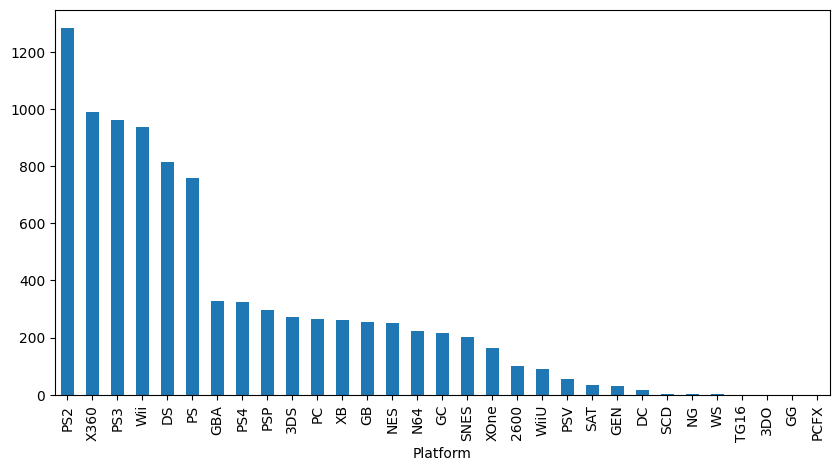

In [5]:
df.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False).plot(kind='bar', figsize=(10, 5))

In [12]:
# create new df with have genre and number of games in that genre in every year
new_df = df.groupby(['Year_of_Release', 'Genre']).size().unstack().fillna(0)
new_df = new_df.astype(int)
# new_df : have 3 columns (Year_of_Release, Genre, Number_of_Games) Ex: action has 100 games in 2000, action has 200 games in 2001, ...
new_df_stacked = new_df.stack().reset_index()
new_df_stacked.columns = [ 'Year_of_Release','Genre', 'Number_of_Games']
new_df_stacked

,Year_of_Release,Genre,Number_of_Games
0,1980.0,Action,1
1,1980.0,Adventure,0
2,1980.0,Fighting,1
3,1980.0,Misc,4
4,1980.0,Platform,0
...,...,...,...
463,2020.0,Role-Playing,0
464,2020.0,Shooter,0
465,2020.0,Simulation,1
466,2020.0,Sports,0


In [18]:
df['Publisher'].nunique()

KeyError: 'Publisher'

In [13]:
list_genre = new_df_stacked['Genre'].unique()
list_genre

array(['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
       'Strategy'], dtype=object)

In [14]:
# số game trong năm x = số game trong ra đời trong năm x + số game năm x-1
data = { year: { genre: 0 for genre in list_genre } for year in range(1980, 2017) }

for year in range(1980, 2017):
    for genre in list_genre:
        if year == 1980:
            data[year][genre] = new_df_stacked[(new_df_stacked['Year_of_Release'] == year) & (new_df_stacked['Genre'] == genre)]['Number_of_Games'].values[0]
        else:
            data[year][genre] = data[year-1][genre] + new_df_stacked[(new_df_stacked['Year_of_Release'] == year) & (new_df_stacked['Genre'] == genre)]['Number_of_Games'].values[0]

df = pd.DataFrame(data).T

In [15]:
# change df to 3 columns (Year_of_Release, Genre, Number_of_Games)
df_stacked = df.stack().reset_index()
df_stacked.columns = [ 'Year_of_Release','Genre', 'Number_of_Games']
df_stacked

,Year_of_Release,Genre,Number_of_Games
0,1980,Action,1
1,1980,Adventure,0
2,1980,Fighting,1
3,1980,Misc,4
4,1980,Platform,0
...,...,...,...
439,2016,Role-Playing,1517
440,2016,Shooter,1347
441,2016,Simulation,879
442,2016,Sports,2380


In [16]:
df_stacked[df_stacked['Genre'] == 'Misc']

,Year_of_Release,Genre,Number_of_Games
3,1980,Misc,4
15,1981,Misc,4
27,1982,Misc,5
39,1983,Misc,6
51,1984,Misc,7
63,1985,Misc,7
75,1986,Misc,7
87,1987,Misc,7
99,1988,Misc,7
111,1989,Misc,8


In [17]:
df_stacked.to_csv('Genre_Year.csv', index=False)